In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Read the CSV file with on_bad_lines to skip problematic lines
news_data = pd.read_csv('/content/news.csv', on_bad_lines='skip')

# Display the first 10 rows of the dataset
print(news_data.head(10))

# Check for missing values
print(news_data.isnull().sum())

# Drop rows with missing values
news_data.dropna(inplace=True)

# Check again for missing values
print(news_data.isnull().sum())

# Split the data into training and test sets
X = news_data['text']
y = news_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Create a PassiveAggressiveClassifier
passive = PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = passive.predict(tfidf_test)

# Evaluate the model
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

confusion = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(confusion)


   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Ka

In [ ]:
#Create a confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[587,  41],
       [ 44, 595]])

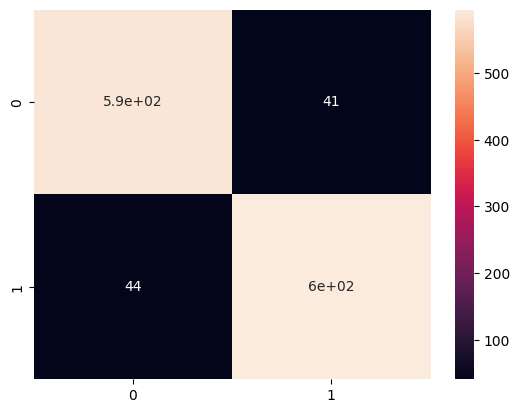

In [ ]:
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

93.29123914759275

# ***The Model's Accuracy is 93%***

In [ ]:
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       628
        REAL       0.94      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

